In [7]:
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# assume some unit gaussian 10-D input data
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10   # 10 hidden layer, each with 500 nuerons
nonlinearities = ['tanh']*len(hidden_layer_sizes)

## Single forward pass

In [3]:
act = {'relu': lambda x: np.maximum(0, x), 'tanh': lambda x: np.tanh(x)}

# single forward pass
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 0.01 # layer initialization
    
    H = np.dot(X, W) # matrix multipy
    H = act[nonlinearities[i]](H) # nonlinearity
    Hs[i] = H # cache result on this layer

## look at distribution at each layer

In [6]:
print('Input layer had mean= {} and std= {}'.format(np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print("Hidden layer {} had mean= {} and std= {}".format(i+1, layer_means[i], layer_stds[i]))

Input layer had mean= -0.0008854001742458289 and std= 0.9988633503267429
Hidden layer 1 had mean= -0.0001658592649576133 and std= 0.21335545814288906
Hidden layer 2 had mean= -0.00011212516450569792 and std= 0.04749618525152081
Hidden layer 3 had mean= 2.3613379507439973e-06 and std= 0.010655325931754545
Hidden layer 4 had mean= -8.529640803182143e-06 and std= 0.002371547985417816
Hidden layer 5 had mean= -1.2291472582519656e-07 and std= 0.0005316111364347173
Hidden layer 6 had mean= 2.5085637475300677e-07 and std= 0.00011916194414013976
Hidden layer 7 had mean= -1.5913805387012765e-08 and std= 2.6690063619497156e-05
Hidden layer 8 had mean= 5.490675845366033e-09 and std= 5.996933245708123e-06
Hidden layer 9 had mean= 3.7707783878993113e-10 and std= 1.3455500744648587e-06
Hidden layer 10 had mean= -3.5400933154478343e-10 and std= 3.0199271252650637e-07


## Plot the means and standrad deviations of activation

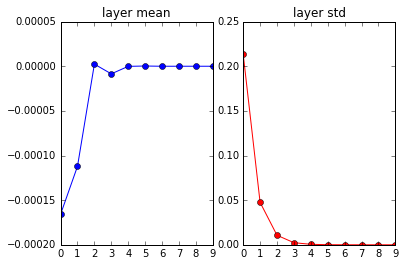

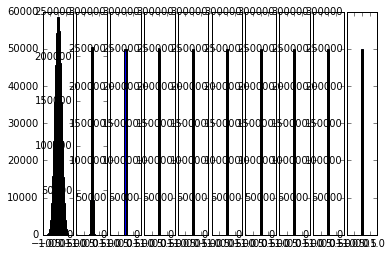

In [33]:
plt.figure()
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')
plt.show()

# plot the raw distribution
fig = plt.figure()
fig.subplots_adjust(hspace=0.10, wspace=0.10)  # not working 
for i, H in Hs.items():
    ax = fig.add_subplot(1, len(Hs), i+1)
    ax.hist(H.ravel(), 30, range=(-1, 1))

plt.show()